In [1]:
import tensorflow as tf
import numpy as np

In [2]:
model = tf.saved_model.load('model_v1')

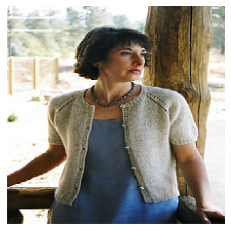

In [3]:
import os
import matplotlib.pyplot as plt

img = tf.keras.preprocessing.image.load_img('img/01/01-221-summer-cardigan_003.jpg', target_size=[224, 224])
plt.imshow(img)
plt.axis('off')
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.mobilenet.preprocess_input(
    x[tf.newaxis,...])

In [4]:
print(list(model.signatures.keys()))

['serving_default']


In [5]:
infer = model.signatures["serving_default"]
print(infer.structured_outputs)

{'dense': TensorSpec(shape=(None, 23), dtype=tf.float32, name='dense')}


In [6]:
features = infer(tf.constant(x))
features

{'dense': <tf.Tensor: shape=(1, 23), dtype=float32, numpy=
 array([[-61.444145  ,   1.6052154 ,   1.2178009 ,  -3.5444357 ,
          -6.0717707 ,   0.39806616,  -1.565629  ,  -8.759293  ,
           0.4341034 ,   1.3259856 ,   2.3289847 ,  -4.9874454 ,
          -6.343065  , -12.056579  ,   1.7931572 ,   3.5989113 ,
          -0.7798021 ,  -8.5282345 ,  -0.6507275 ,  -6.0852537 ,
          -9.144956  ,  -8.55877   ,  -2.457037  ]], dtype=float32)>}

In [20]:
features['dense'].numpy()

array([[-61.444145  ,   1.6052154 ,   1.2178009 ,  -3.5444357 ,
         -6.0717707 ,   0.39806616,  -1.565629  ,  -8.759293  ,
          0.4341034 ,   1.3259856 ,   2.3289847 ,  -4.9874454 ,
         -6.343065  , -12.056579  ,   1.7931572 ,   3.5989113 ,
         -0.7798021 ,  -8.5282345 ,  -0.6507275 ,  -6.0852537 ,
         -9.144956  ,  -8.55877   ,  -2.457037  ]], dtype=float32)